In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)
n_employees = 1000
departments = ['Sales', 'Marketing', 'Engineering', 'HR', 'Finance', 'Operations']

data = {
    'Employee_ID': np.arange(1, n_employees + 1),
    'Department': np.random.choice(departments, n_employees, p=[0.25, 0.15, 0.30, 0.10, 0.10, 0.10]),
    'Age': np.random.randint(22, 60, n_employees),
    'Years_of_Experience': np.random.randint(0, 30, n_employees),
    'Training_Hours': np.random.gamma(2, 20, n_employees).astype(int),  # Skewed distribution
    'Performance_Score': np.random.beta(5, 2, n_employees) * 100,  # Skewed towards higher scores
}

df = pd.DataFrame(data)

df['Years_of_Experience'] = np.minimum(df['Years_of_Experience'], df['Age'] - 20)

dept_salary_mean = {'Sales': 80000, 'Marketing': 75000, 'Engineering': 100000,
                    'HR': 65000, 'Finance': 90000, 'Operations': 70000}
df['Base_Salary'] = df['Department'].map(dept_salary_mean)
df['Salary'] = (
    df['Base_Salary'] +
    df['Years_of_Experience'] * 3000 +
    df['Performance_Score'] * 200 +
    np.random.normal(0, 10000, n_employees)
).astype(int)

dept_wlb = {'Sales': 5.5, 'Marketing': 6.0, 'Engineering': 7.5, 'HR': 8.0, 'Finance': 6.5, 'Operations': 7.0}
df['WLB_Score'] = df['Department'].map(dept_wlb) + np.random.normal(0, 1, n_employees)
df['WLB_Score'] = np.clip(df['WLB_Score'], 1, 10)

df['Training_Investment'] = df['Training_Hours'] * 50

df['Performance_Score'] += (df['Training_Hours'] / 10) + np.random.normal(0, 5, n_employees)
df['Performance_Score'] = np.clip(df['Performance_Score'], 0, 100)

print(df.head())

   Employee_ID   Department  Age  Years_of_Experience  Training_Hours  \
0            1    Marketing   33                   13              37   
1            2   Operations   37                   15              46   
2            3           HR   45                   25              30   
3            4  Engineering   40                   16              33   
4            5        Sales   29                    7              64   

   Performance_Score  Base_Salary  Salary  WLB_Score  Training_Investment  
0          50.923948        75000  116439   5.217243                 1850  
1          49.615203        70000  129137   9.383457                 2300  
2          67.357056        65000  149613   7.883595                 1500  
3          59.442363       100000  158720   9.166753                 1650  
4          87.189137        80000  124302   5.807221                 3200  


/tmp/ipython-input-4056985487.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Department', order=departments, ax=axs[0,0], palette='viridis')
/tmp/ipython-input-4056985487.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_salary.index, y=avg_salary.values, ax=axs[0,1], palette='plasma')
/tmp/ipython-input-4056985487.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_invest.index, y=total_invest.values, ax=axs[1,0], palette='magma')
/tmp/ipython-input-4056985487.py:35: FutureWarning: 

Passing `palette` wi

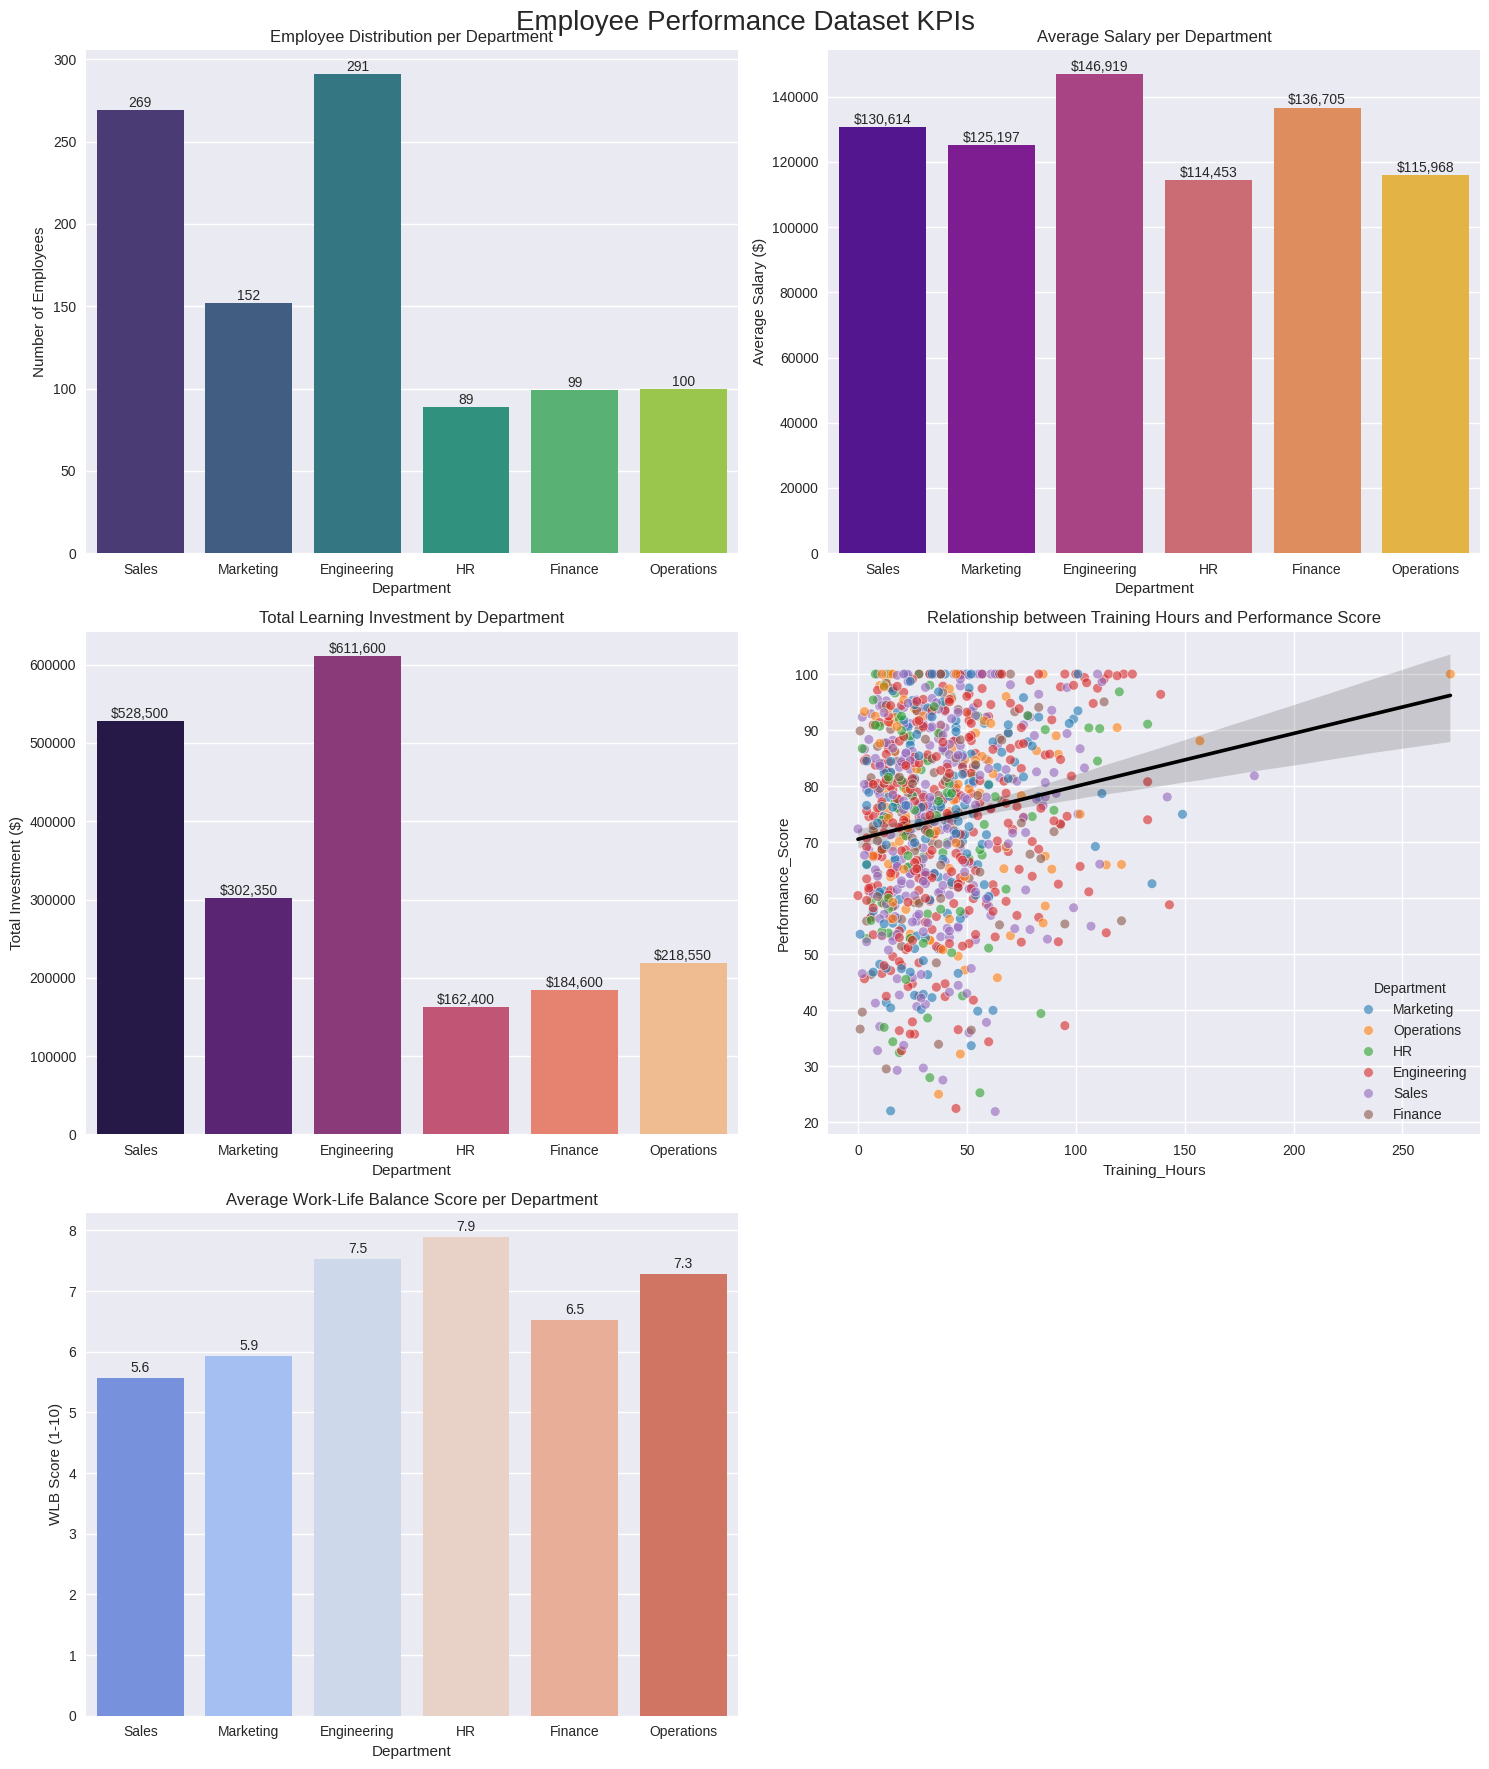

In [ ]:
plt.style.use('seaborn-v0_8')
fig, axs = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Employee Performance Dataset KPIs', fontsize=20)

# 1. Employee distribution per department
sns.countplot(data=df, x='Department', order=departments, ax=axs[0,0], palette='viridis')
axs[0,0].set_title('Employee Distribution per Department')
axs[0,0].set_ylabel('Number of Employees')
for p in axs[0,0].patches:
    axs[0,0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')

# 2. Average salary per department
avg_salary = df.groupby('Department')['Salary'].mean().reindex(departments)
sns.barplot(x=avg_salary.index, y=avg_salary.values, ax=axs[0,1], palette='plasma')
axs[0,1].set_title('Average Salary per Department')
axs[0,1].set_ylabel('Average Salary ($)')
for i, v in enumerate(avg_salary.values):
    axs[0,1].text(i, v + 1000, f'${v:,.0f}', ha='center')

# 3. Learning investment by department (total)
total_invest = df.groupby('Department')['Training_Investment'].sum().reindex(departments)
sns.barplot(x=total_invest.index, y=total_invest.values, ax=axs[1,0], palette='magma')
axs[1,0].set_title('Total Learning Investment by Department')
axs[1,0].set_ylabel('Total Investment ($)')
for i, v in enumerate(total_invest.values):
    axs[1,0].text(i, v, f'${v:,.0f}', ha='center', va='bottom')

# 4. Relationship between training and performance
sns.scatterplot(data=df, x='Training_Hours', y='Performance_Score', hue='Department', alpha=0.6, ax=axs[1,1], palette='tab10')
sns.regplot(data=df, x='Training_Hours', y='Performance_Score', scatter=False, ax=axs[1,1], color='black')
axs[1,1].set_title('Relationship between Training Hours and Performance Score')

# 5. Department-wise WLB health
avg_wlb = df.groupby('Department')['WLB_Score'].mean().reindex(departments)
sns.barplot(x=avg_wlb.index, y=avg_wlb.values, ax=axs[2,0], palette='coolwarm')
axs[2,0].set_title('Average Work-Life Balance Score per Department')
axs[2,0].set_ylabel('WLB Score (1-10)')
for i, v in enumerate(avg_wlb.values):
    axs[2,0].text(i, v + 0.1, f'{v:.1f}', ha='center')

axs[2,1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/indian_food.csv')
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,1


In [ ]:
df['region'].replace(' ', 'Unknown', inplace=True)

/tmp/ipython-input-4052258662.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].replace(' ', 'Unknown', inplace=True)


In [ ]:
df.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,1


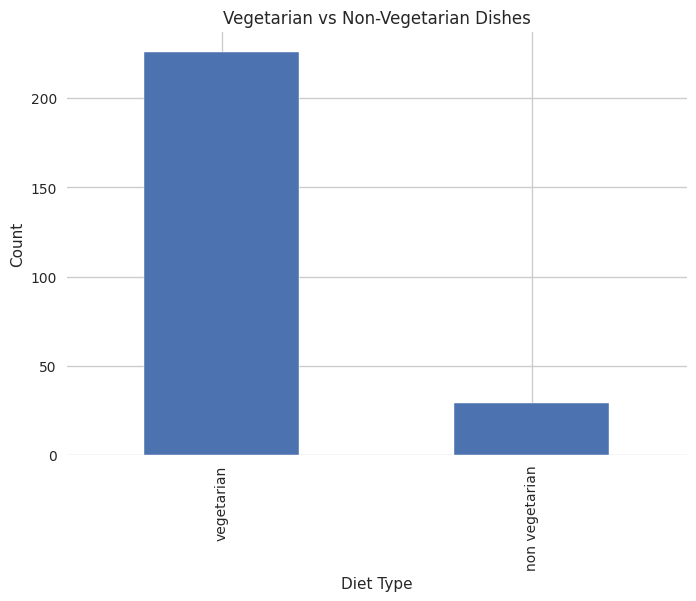

Count of unique dishes: 255


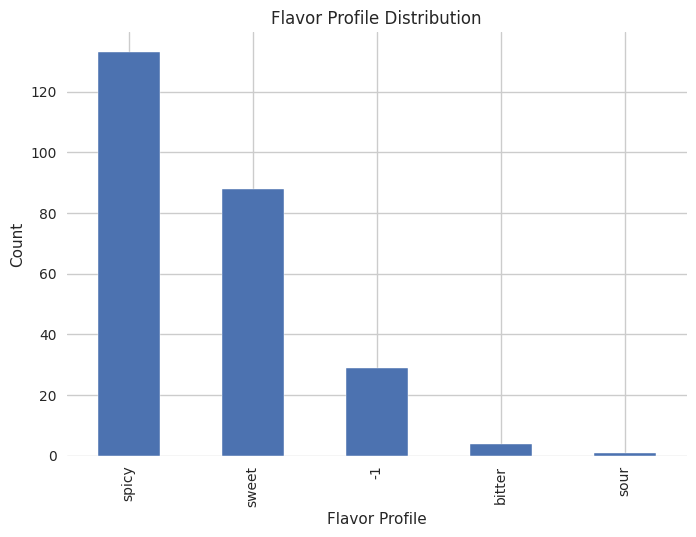

In [ ]:
plt.figure()
df["diet"].value_counts().plot(kind="bar")
plt.title("Vegetarian vs Non-Vegetarian Dishes")
plt.xlabel("Diet Type")
plt.ylabel("Count")
plt.show()

print("Count of unique dishes:", df["name"].nunique())

plt.figure()
df["flavor_profile"].value_counts().plot(kind="bar")
plt.title("Flavor Profile Distribution")
plt.xlabel("Flavor Profile")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-996553090.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=diet_counts.index, y=diet_counts.values, palette='Set2')
/tmp/ipython-input-996553090.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flavor_counts.index, y=flavor_counts.values, palette='viridis')



Count of unique dishes in the dataset: 255
Count of unique flavor profiles: 5
flavor_profile
spicy     133
sweet      88
-1         29
bitter      4
sour        1
Name: count, dtype: int64


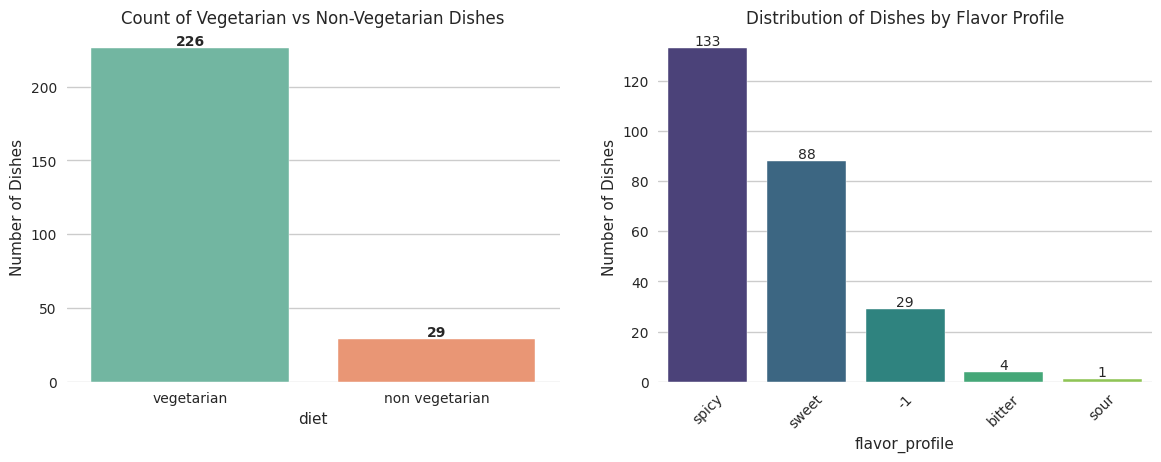

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(14, 10))

# 1. Count of vegetarian and non-vegetarian dishes using bar graph
plt.subplot(2, 2, 1)
diet_counts = df['diet'].value_counts()
sns.barplot(x=diet_counts.index, y=diet_counts.values, palette='Set2')
plt.title('Count of Vegetarian vs Non-Vegetarian Dishes')
plt.ylabel('Number of Dishes')
for i, v in enumerate(diet_counts.values):
    plt.text(i, v + 2, str(v), ha='center', fontweight='bold')

# 2. Count of unique dishes
unique_dishes = df['name'].nunique()
print(f"\nCount of unique dishes in the dataset: {unique_dishes}")

# 3. Count of unique flavored dishes (unique flavor profiles)
unique_flavors = df['flavor_profile'].nunique()
flavor_counts = df['flavor_profile'].value_counts()
print(f"Count of unique flavor profiles: {unique_flavors}")
print(flavor_counts)

# Bar graph for flavor profiles
plt.subplot(2, 2, 2)
sns.barplot(x=flavor_counts.index, y=flavor_counts.values, palette='viridis')
plt.title('Distribution of Dishes by Flavor Profile')
plt.ylabel('Number of Dishes')
plt.xticks(rotation=45)
for i, v in enumerate(flavor_counts.values):
    plt.text(i, v + 1, str(v), ha='center')


In [ ]:
from transformers import pipeline